In [ ]:
# Fontes
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_masked.html#sphx-glr-gallery-lines-bars-and-markers-scatter-masked-py
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

In [1]:
# Importação das bibliotecas necessárias

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


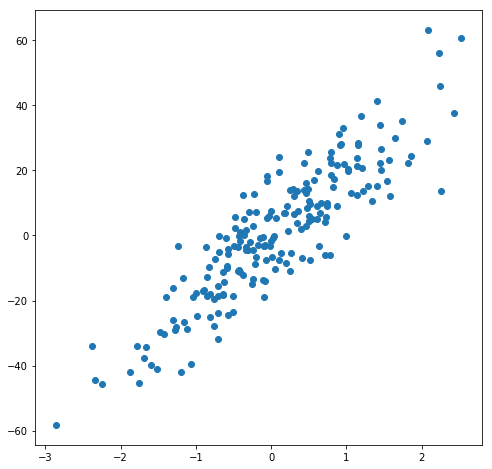

In [16]:
# Criando dados de regressão
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples = 200, n_features = 1, noise = 10, random_state = 5)

plt.scatter(X, Y)
plt.show()

In [4]:
# Função que retorna os resultados do modelo
def retornaResultadosModeloKNN_Regressao(random_state, quantidade, dados, respostas):
    #Divisão entre observações de teste e observações de treino
    X_train, X_test, y_train, y_test = train_test_split(dados, respostas, random_state = random_state)
    # Vetores de armazenamento dos resultados de teste e de treino
    quantidade_k = range(1,quantidade + 1)
    res_teste = []
    res_treino = []
    
    # loop das classificações

    for i in quantidade_k:
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(X_train, y_train)

        # Adicionando os valores dos resultados a seus respectivos vetores
        res_treino.append(knn.score(X_train, y_train))
        res_teste.append(knn.score(X_test, y_test))
        
    return quantidade_k, res_treino, res_teste

[]

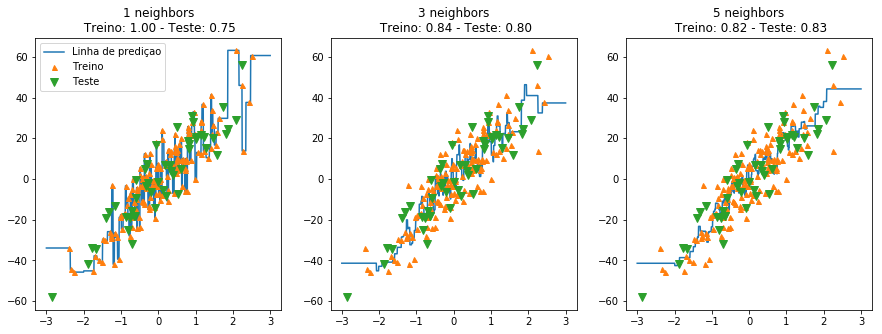

In [17]:
# Exibindo as linhas de predição
#legendas = ["Linha de prediçao", "Treino", "Teste"]
figura, eixos = plt.subplots(2, 2, figsize=(10,10))

# Código para criar a linha de predição dos dados de treino
# onde é criado 1.000 valores igualmente espaçados entre -3 e 3
linha = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ex in zip([1,3,5], eixos):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ex.plot(linha, reg.predict(linha))
    ex.plot(X_train, y_train, '^', markersize=5)
    ex.plot(X_test, y_test, 'v', markersize=8)
    
    ex.set_title("{} neighbors\n Treino: {:.2f} - Teste: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))

eixos[0].legend(legendas)

plt.plot()

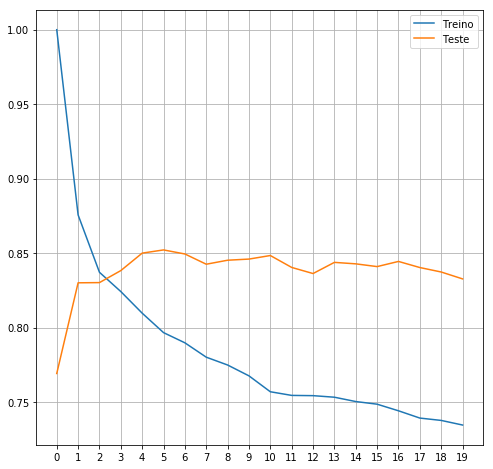

In [18]:
dados = X
respostas = Y

legendas = ["Treino", "Teste"]
quantidade = 20
rand = 5
quantidade_k, res_treino, res_teste = retornaResultadosModeloKNN_Regressao(rand, quantidade, dados, respostas)
plt.rcParams["figure.figsize"] = [8,8]
plt.plot(res_treino)
plt.plot(res_teste)
plt.legend(legendas)
plt.grid(True)
plt.xticks(np.arange(0,20, step=1))
plt.show()